In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import chemparse as cp

#no dado original, havia uma coluna sem nome (com os indexes). seria difícil remover assim. Nomeei-a de "A", para priorizar 
#o index do pandas.


In [2]:
#criando o DataFrame "df_chem" (e talvez outros DataFrames)
df = pd.read_csv("Minerals_Database3.csv")
df = df.drop(['A'], axis=1)
df = df.drop(['Name'], axis=1)
df_chem = df.reindex(df.columns[[0, 1, 2, 3,4,5,6,7,8,9,136,137]], axis=1)
df_chem.shape
#print(df_chem)

(3112, 12)

In [3]:
#relação de Pearson
def Pearson(DataFrame):
    data = DataFrame
    data.shape
    corrmat = data.corr()
    f, ax = plt.subplots(figsize =(32, 18))
    sns.heatmap(corrmat, ax = ax, cmap ="RdBu", linewidths = 0.1, vmin=-1, vmax=1, annot=True)

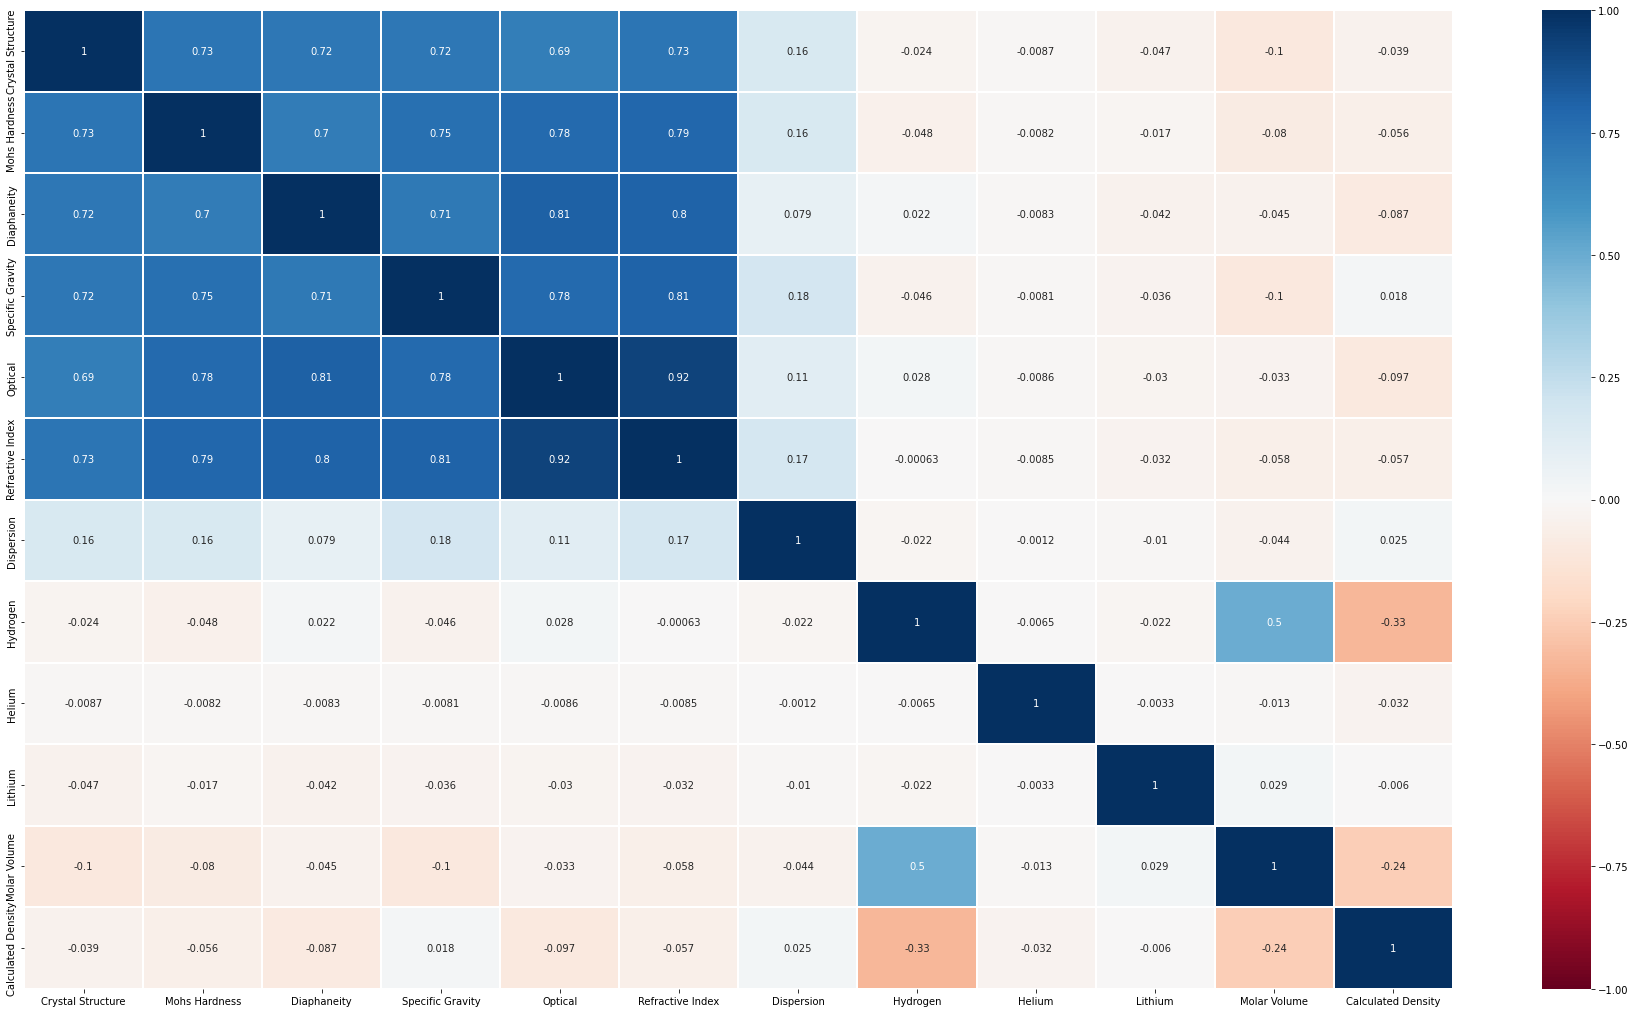

In [4]:
Pearson(df_chem)

<AxesSubplot:>

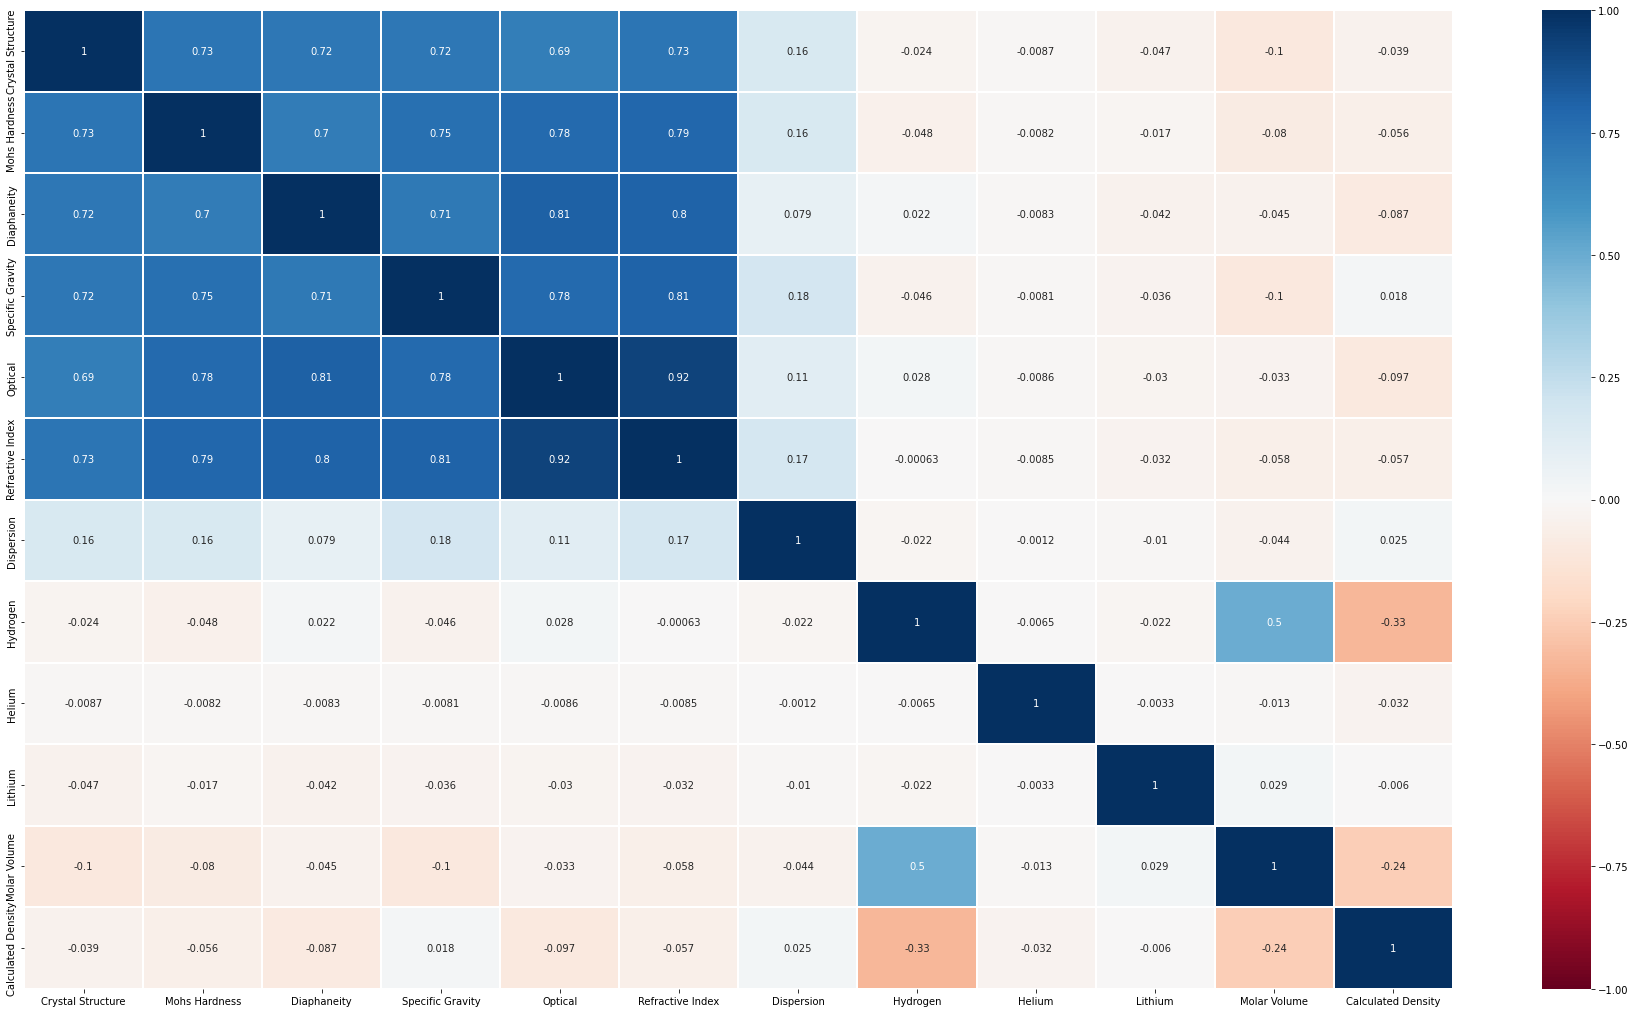

In [5]:
#relação de Pearson backup
data = df_chem
data.shape
corrmat = data.corr()
f, ax = plt.subplots(figsize =(32, 18))
sns.heatmap(corrmat, ax = ax, cmap ="RdBu", linewidths = 0.1, vmin=-1, vmax=1, annot=True)

In [6]:
#correlação de Spearman
import numpy as np
from scipy.stats import spearmanr #x e y
def Spearman(DataFrame, tam_matrizx,tam_matrizy):
    matriz = np.zeros((tam_matrizx,tam_matrizy))
#spearmat = pd.DataFrame(a,columns=df_chem.columns)
#print(a)
    for i in range(0,tam_matrizx):
        for j in range(0,tam_matrizy):
            if i >= j:
                x = DataFrame.iloc[:,i]
                y = DataFrame.iloc[:,j]
            
                dados_tratados = spearmanr(x,y)[0]
            #print(b)
                matriz[i,j] = dados_tratados
                matriz[j,i] = dados_tratados
            
    spearmat = pd.DataFrame(matriz,columns=DataFrame.columns, index=DataFrame.columns)            
    f, ax = plt.subplots(figsize =(32, 18))
    sns.heatmap(spearmat, ax = ax, cmap ="RdBu", linewidths = 0.1, vmin=-1, vmax=1, annot=True)


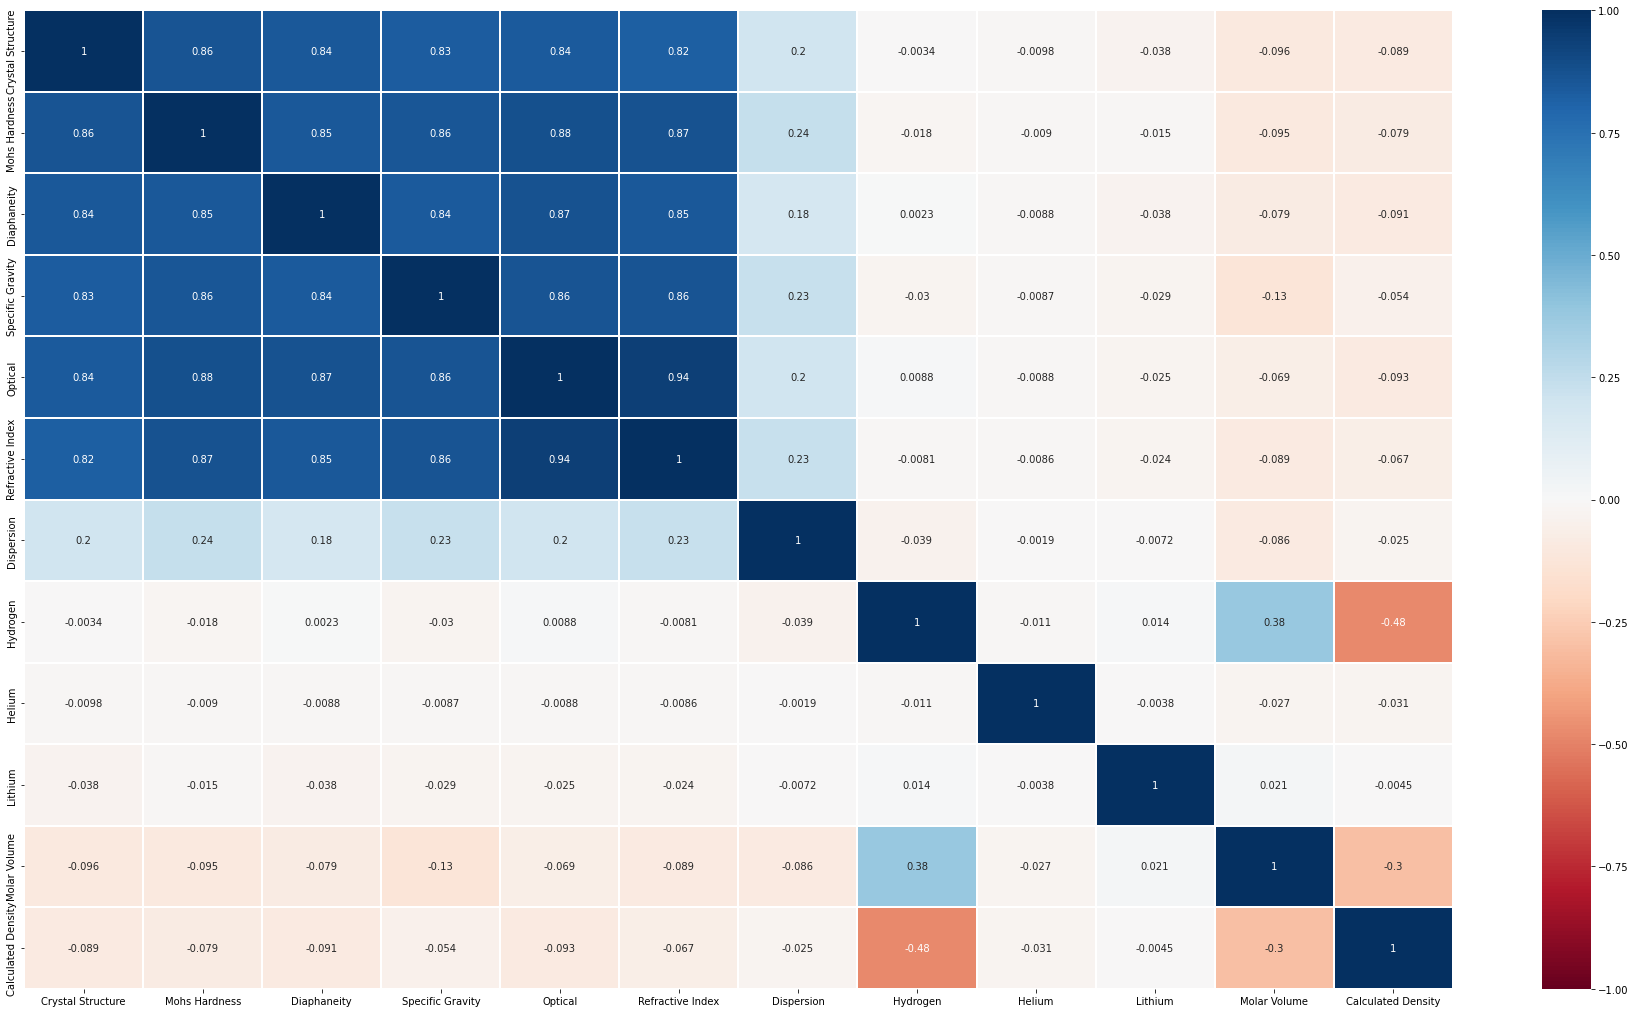

In [7]:
Spearman(df_chem,12,12)

<AxesSubplot:>

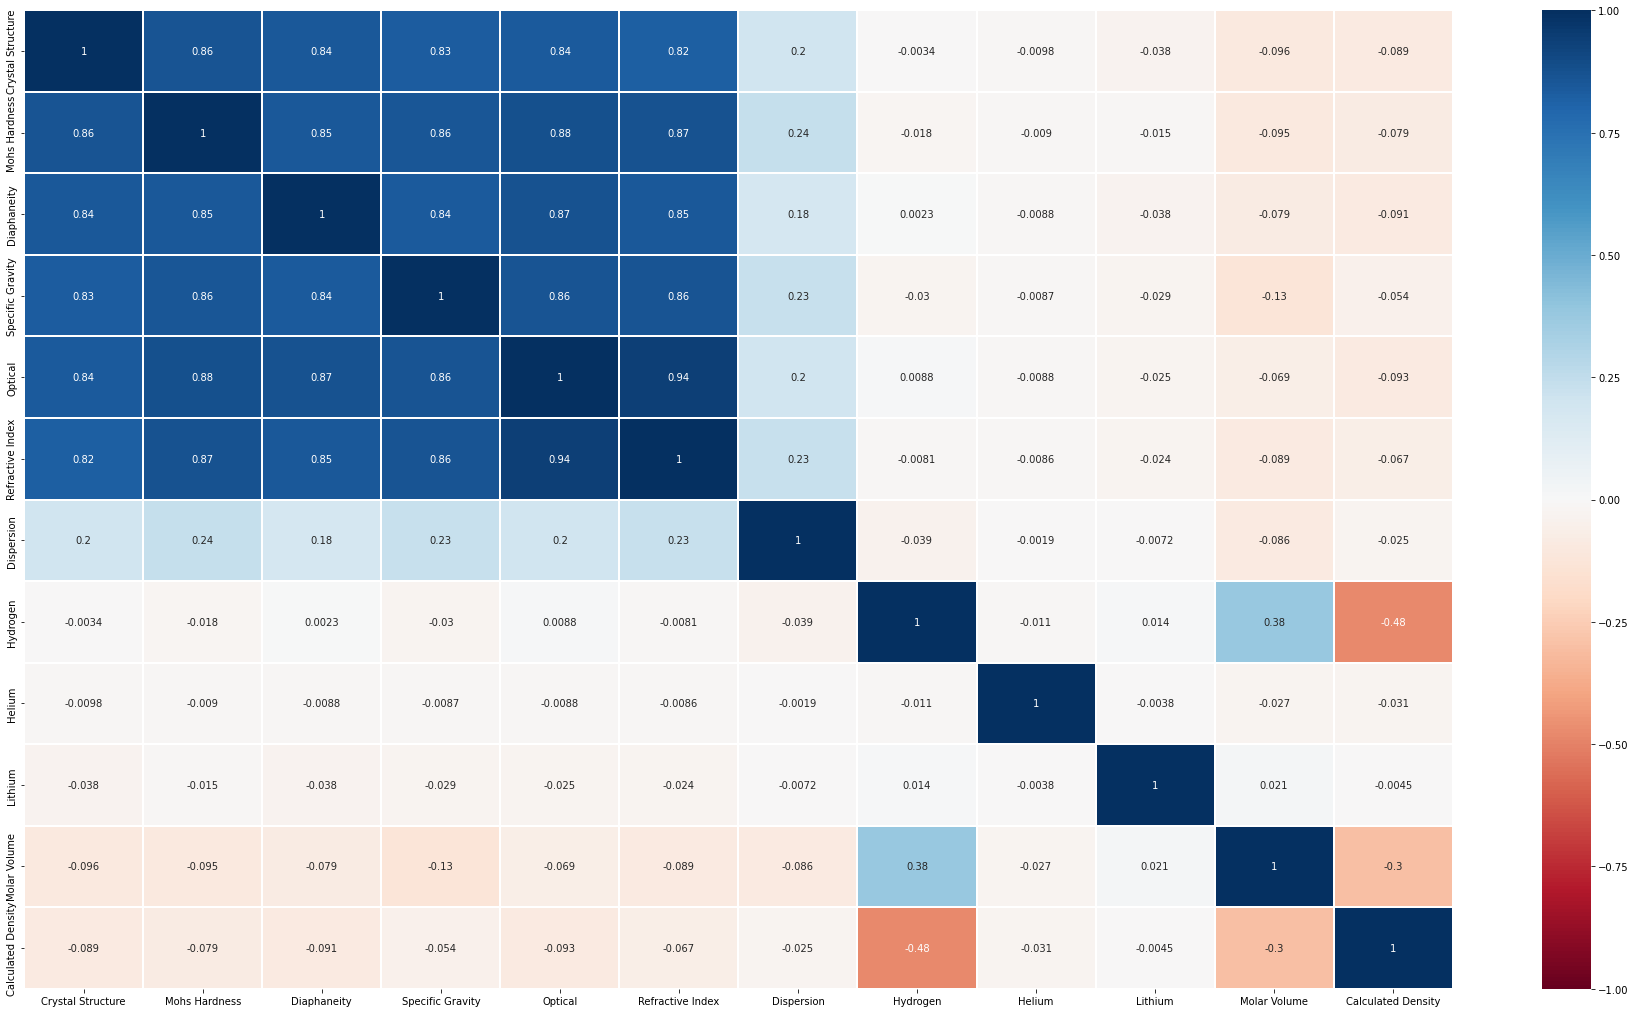

In [8]:
#Correlação de Spearman backup
import numpy as np
from scipy.stats import spearmanr #x e y
a = np.zeros((12,12))
#spearmat = pd.DataFrame(a,columns=df_chem.columns)
#print(a)
for i in range(0,12):
    for j in range(0,12):
        if i >= j:
            x = df_chem.iloc[:,i]
            y = df_chem.iloc[:,j]
            
            b = spearmanr(x,y)[0]
            #print(b)
            a[i,j] = b
            a[j,i] = b
            
spearmat = pd.DataFrame(a,columns=df_chem.columns, index=df_chem.columns)            
f, ax = plt.subplots(figsize =(32, 18))
sns.heatmap(spearmat, ax = ax, cmap ="RdBu", linewidths = 0.1, vmin=-1, vmax=1, annot=True)
